# import, clone, ..


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
retina_dir = r'/content/drive/MyDrive/Colab Notebooks/workshop/CNN-project-weights/mobilenet0.25_Final.pth'
net_dir = r'/content/drive/MyDrive/Colab Notebooks/workshop/CNN-project-weights/mobilefacenet_model_best.pth.tar'

In [3]:
!git clone https://github.com/danielroich/Face-Identity-Disentanglement-via-StyleGan2.git OurGitFolder

Cloning into 'OurGitFolder'...
remote: Enumerating objects: 495, done.
remote: Counting objects: 100% (495/495), done.
remote: Compressing objects: 100% (484/484), done.
remote: Total 495 (delta 119), reused 382 (delta 6), pack-reused 0
Receiving objects: 100% (495/495), 29.36 MiB | 34.60 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [4]:
import os
os.chdir('/content')
CODE_DIR = 'OurGitFolder'
os.chdir(f'./{CODE_DIR}')

In [5]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from Models.Encoders.Landmark_Encoder.Landmark_Encoder import *

# examples

In [6]:
E_lnd = Encoder_Landmarks(net_dir, retina_dir)

In [7]:
img1 = cv2.imread("/content/OurGitFolder/Datasets/real_small/0000/00048.png")
img2 = cv2.imread("/content/OurGitFolder/Datasets/real_small/0000/00053.png")
imgs = np.concatenate((img1.reshape(1,256,256,3), img2.reshape(1,256,256,3)), 0)

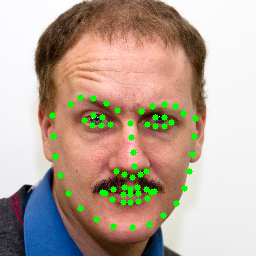

In [12]:
E_lnd.model = E_lnd.model.eval()
outputs_e, landmarks_e = E_lnd(imgs)
img_e = drawLandmark_only(img1, landmarks_e[0])
cv2_imshow(img_e)

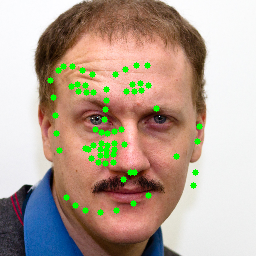

In [18]:
E_lnd.model = E_lnd.model.train()
outputs_t, landmarks_t = E_lnd(imgs)
img_t = drawLandmark_only(img1, landmarks_t[0])
cv2_imshow(img_t)

# backward

In [8]:
E_lnd = Encoder_Landmarks(net_dir, retina_dir)

In [10]:
E_lnd = E_lnd.eval()

In [9]:
img1 = cv2.imread("/content/OurGitFolder/Datasets/real_small/0000/00048.png")
img2 = cv2.imread("/content/OurGitFolder/Datasets/real_small/0000/00053.png")
imgs = np.concatenate((img1.reshape(1,256,256,3), img2.reshape(1,256,256,3)), 0)

In [11]:
outputs_t, landmarks_t  = E_lnd(imgs) 

In [13]:
loss = E_lnd.loss(landmarks_t[0], landmarks_t[1]) 

In [14]:
loss

tensor(89.2827, grad_fn=<NormBackward1>)

In [15]:
loss.backward()